WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



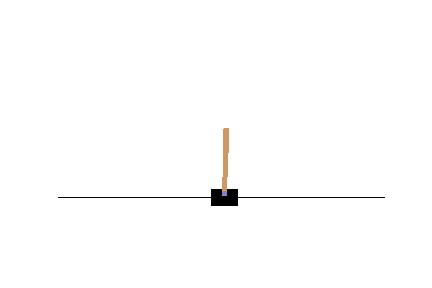
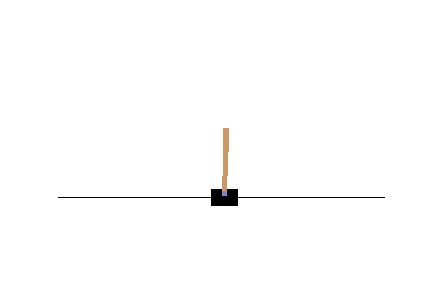
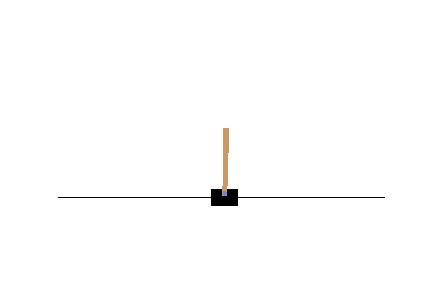
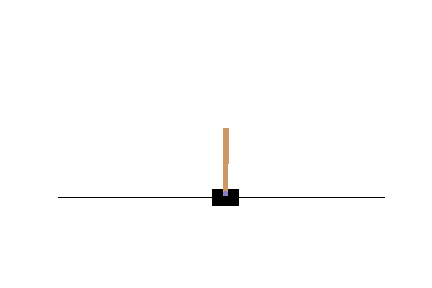
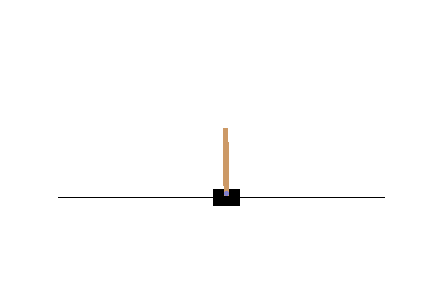
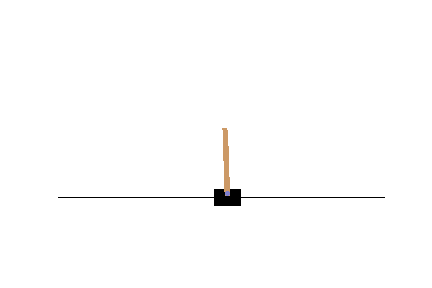
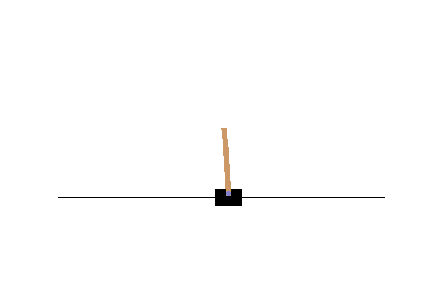
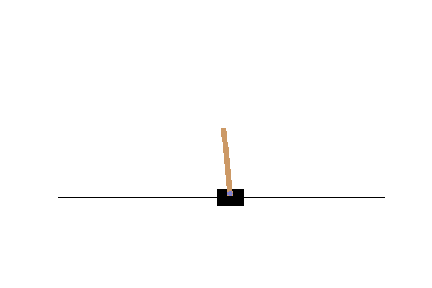
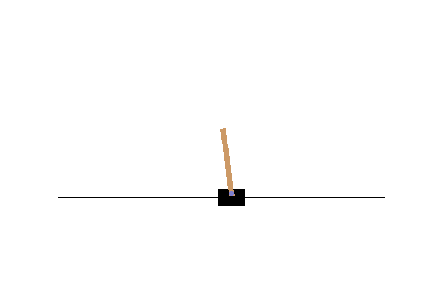
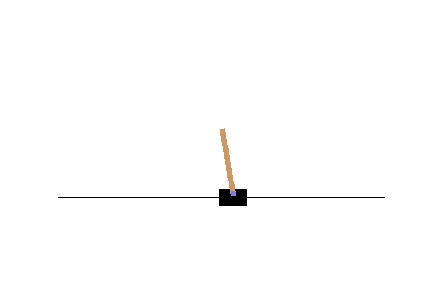
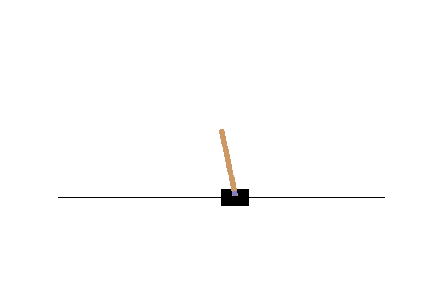

22.0066
[[[[[2.05170372e-04 4.17779652e-04]
    [7.26991873e-03 5.78522428e-03]
    [7.44569730e-04 3.15345891e-03]
    ...
    [1.89693089e-04 1.99664144e-03]
    [4.50441197e-03 6.75656093e-04]
    [6.31204258e-03 7.27612396e-03]]

   [[8.28291417e-03 1.00320981e-04]
    [9.88709189e-03 7.89858545e-03]
    [5.77235219e-03 7.06378481e-05]
    ...
    [2.43171714e-03 1.63297872e-03]
    [2.22759561e-04 8.56022417e-03]
    [5.27996051e-03 1.23447129e-03]]

   [[1.04598041e-03 2.81107219e-03]
    [7.72644401e-03 7.52069535e-03]
    [9.00745027e-03 5.27424581e-03]
    ...
    [9.12125687e-03 3.10340878e-03]
    [3.52536013e-03 2.05309953e-03]
    [1.33879441e-03 5.87505261e-03]]

   ...

   [[4.90475896e-03 3.81153500e-03]
    [2.73719398e-03 7.01975434e-03]
    [1.96723414e-03 4.91887014e-03]
    ...
    [3.51854376e-03 6.95350762e-03]
    [5.80881427e-03 5.97897914e-03]
    [6.62587325e-03 6.07912942e-03]]

   [[4.86106162e-03 5.65667217e-03]
    [9.64015954e-03 2.06907295e-03]
    [1.2

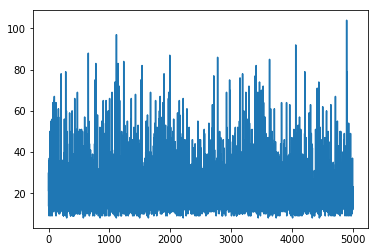

In [12]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=100)
    display(display_animation(anim, default_mode='loop'))

def index_x(val):
    r = int(np.sign(val) * np.log(np.absolute(val)*120+1)/0.11332868530700327 + 50.5)
    if r < 0:
        return 0
    if r > 99:
        return 99
    return r

def index_theta(val):
    r = int(np.sign(val) * np.log(np.absolute(val)*1162.6004999999986+1)/0.1099838565275042 + 50.5)
    if r < 0:
        return 0
    if r > 99:
        return 99
    return r

# Learning parameters
num_episodes = 5000
y = 0.99
e = 0.1
pass_line = 200

env = gym.make('CartPole-v0')

resolution = 100
x_threshold = 2.4
theta_threshold_radius = 12 * 2 * math.pi / 360
x_step = 2 * x_threshold / resolution
theta_step = 2 * theta_threshold_radius / resolution

# Initialize a huge Q table
Q = np.random.uniform(0,0.01,(resolution, resolution, resolution, resolution, env.action_space.n))

# Statistics
r_list = []

for i in range(num_episodes):
    
    # Run the environment
    s = env.reset()
    cum_reward = 0

    for t in range(1000):
        
        # Round to nearest
        x = index_x(s[0])
        x_dot = index_x(s[1])
        theta = index_theta(s[2])
        theta_dot = index_theta(s[3])
        
        #print(s)
        #print(x)
        #print(x_dot)
        
        if np.random.rand() < e:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[x, x_dot, theta, theta_dot])
        
        s1,r,d,_ = env.step(a)
        cum_reward += r
        x1 = index_x(s1[0])
        x1_dot = index_x(s1[1])
        theta1 = index_theta(s1[2])
        theta1_dot = index_theta(s1[3])
        Q[x, x_dot, theta, theta_dot, a] += r + y * (np.max(Q[x1, x1_dot, theta1, theta1_dot]))
        s = s1
        if d:
            break;

    r_list.append(cum_reward)

    
s = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    
    x = index_x(s[0])
    x_dot = index_x(s[1])
    theta = index_theta(s[2])
    theta_dot = index_theta(s[3])
    a = np.argmax(Q[x, x_dot, theta, theta_dot])
    
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    s, r, d, _ = env.step(a)
    
    if d:
        break

display_frames_as_gif(frames)
env.close()

plt.plot(r_list)
print(np.average(r_list))
#print(Q)
print(Q[40:60, 40:60, 40:60, 40:60])

In [ ]:
import gym
env = gym.make('CartPole-v0')
s = env.reset()
print(s)
print(env.action_space)
print(env.action_space.n)
print(env.action_space.contains(2))

In [ ]:
import numpy as np
import math
#from IPython.core.debugger import set_trace

S = 2.4 #12 * 2 * math.pi / 360
a = 0.001
res = 100
n = res/2
delta = 1.0
threshold = 0.000000001
x_n = 5

#set_trace()
while delta > threshold:
    x_n1 = x_n - (np.power(x_n,50.0)-S*x_n/a+S/a-1)/(50.0*np.power(x_n,49.0)-S/a)
    delta = np.power(x_n1,50.0)-S*x_n1/a+S/a-1.0
    x_n = x_n1
print(x_n)
print(delta)

q = x_n #1.11626005
xx = np.linspace(-S,S,1000)
print(q/a-1/a)
print(np.log(q))
for x in xx:
    #print(x)
    y = int(np.sign(x) * np.log(np.absolute(x)*(q/a-1/a)+1)/np.log(q) + 50)
    print("%10.8f    : %d " % (x, y))

# Network

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


InternalError: Blas GEMM launch failed : a.shape=(1, 4), b.shape=(4, 1024), m=1, n=1024, k=4
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ExpandDims, Variable/read)]]
	 [[Node: Add_1/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_27_Add_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MatMul', defined at:
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-44780da9a761>", line 58, in <module>
    linear = tf.add(tf.matmul(tf.expand_dims(s_input, 0), weights['hidden']), biases['hidden'])
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2436, in _mat_mul
    name=name)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "c:\users\stephen\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(1, 4), b.shape=(4, 1024), m=1, n=1024, k=4
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ExpandDims, Variable/read)]]
	 [[Node: Add_1/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_27_Add_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [18]:
#x = np.array([[1],[2],[3],[4]])
x = np.array([1,2,3,4])
y = np.array([[1, 2, 3, 4, 5], [1,1,1,1,1], [2,2,2,2,2], [1,1,1,1,1]])
print(x.shape)
print(y.shape)
print(np.reshape(x, [4,1]))
print(np.matmul(x, y))

(4,)
(4, 5)
[[1]
 [2]
 [3]
 [4]]
[13 14 15 16 17]
